<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-11-20 14:11:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  47.0MB/s    in 4.1s    

2025-11-20 14:11:19 (49.3 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 137.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 177.5 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 121.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 132.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 157.0 MB/s eta 0:00:00


In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [33]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [6]:
## Write your code here
QUERY = """
    SELECT CompTotal
    FROM main
    WHERE CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df.value_counts()

CompTotal
100000.0     939
60000.0      839
120000.0     793
80000.0      728
50000.0      705
            ... 
36800.0        1
36720.0        1
177050.0       1
177900.0       1
174500.0       1
Name: count, Length: 3337, dtype: int64

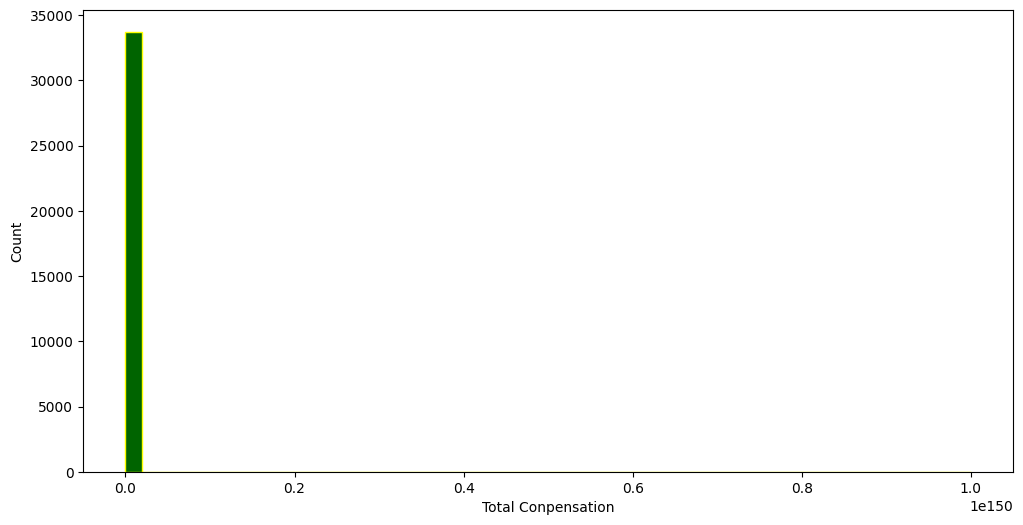

In [7]:
plot_df = df
plt.figure(figsize=(12, 6))
plt.hist(plot_df, bins=50, label='Histogram of Total Compensation', color='darkgreen', edgecolor ='yellow')
plt.xlabel('Total Conpensation')
plt.ylabel('Count')
plt.show()

In [8]:
##here i am going to remove outliers to avoid skewness
q1 = df['CompTotal'].quantile(0.25)
q3 = df['CompTotal'].quantile(0.75)
iqr = q3 - q1
bound_low = q1 - 1.5*iqr
bound_up = q3 + 1.5*iqr

df2_plot = df[(df['CompTotal']>= bound_low) & (df['CompTotal']<=bound_up)]

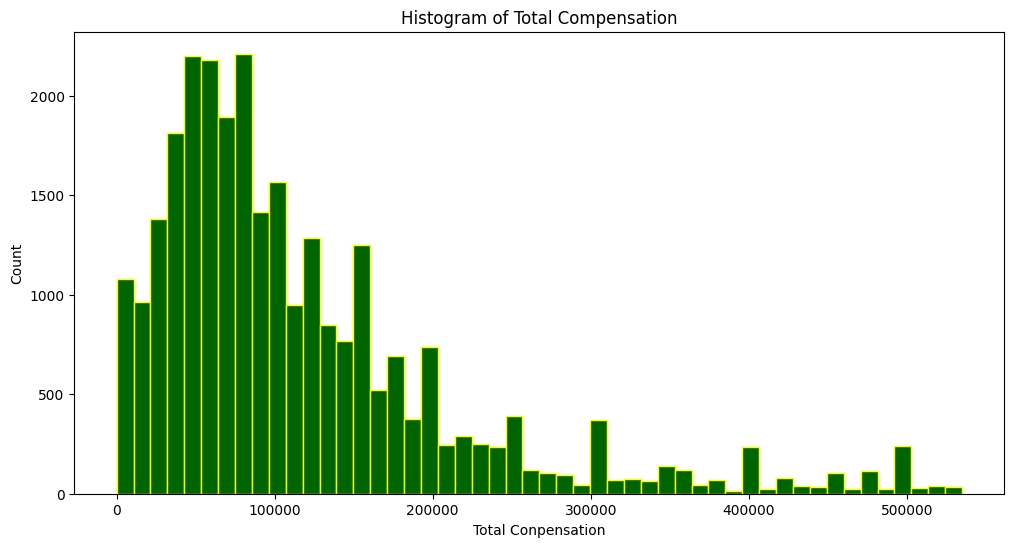

In [9]:
plt.figure(figsize=(12, 6))
plt.hist(df2_plot, bins=50, color='darkgreen', edgecolor ='yellow')
plt.title('Histogram of Total Compensation')
plt.xlabel('Total Conpensation')
plt.ylabel('Count')
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [10]:
## Write your code here
QUERY = """
    SELECT YearsCodePro
    FROM main
    WHERE YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df.value_counts()

YearsCodePro      
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17                     814
30                     689
24                     632
19                     516
22                     492
23                     448
26                     426
21                     380
27                     380
28                     342
35                     285
29                     196
32                     194
40                     194
34                     169
38                     134
33       

In [11]:
df['YearsCodePro'].replace({'More than 50 years':51, 'Less than 1 year':0.5}, inplace=True)
df['YearsCodePro'] = df['YearsCodePro'].astype('float')

/tmp/ipykernel_307/2819515661.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCodePro'].replace({'More than 50 years':51, 'Less than 1 year':0.5}, inplace=True)


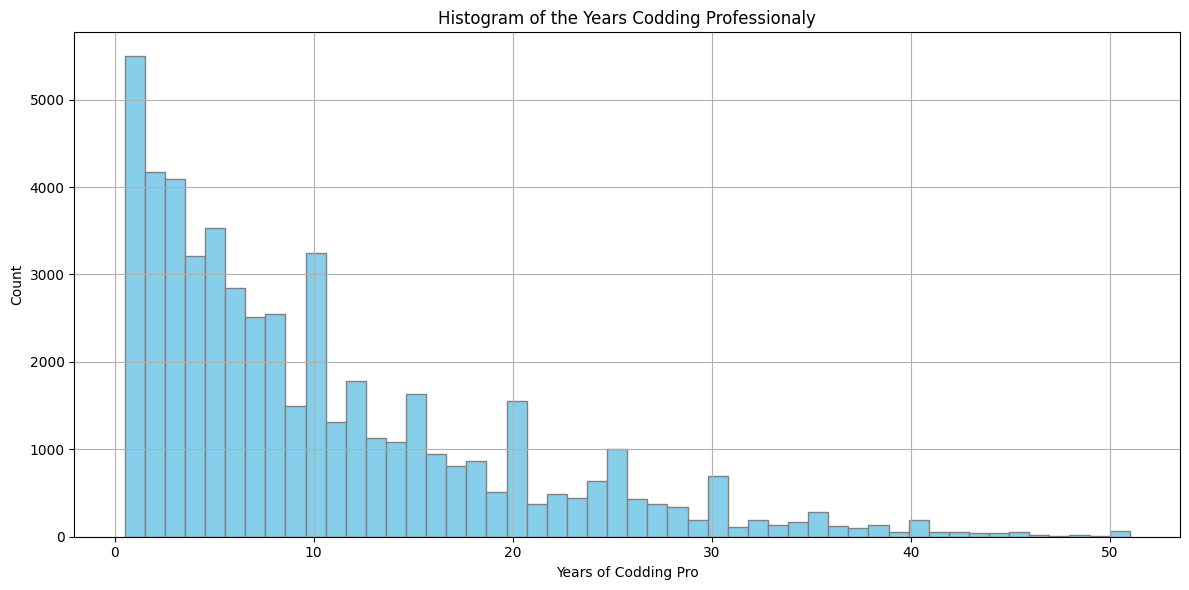

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(df, bins=50, color='skyblue', edgecolor='grey')
plt.title('Histogram of the Years Codding Professionaly')
plt.xlabel('Years of Codding Pro')
plt.ylabel('Count')
plt.tight_layout()
plt.grid(True)
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [13]:
## Write your code here
QUERY = """
    SELECT CompTotal, Age
    FROM main
    WHERE CompTotal IS NOT NULL
    AND Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df.head()

,CompTotal,Age
0,2040000.0,18-24 years old
1,28000.0,25-34 years old
2,85000.0,35-44 years old
3,50000.0,35-44 years old
4,110000.0,25-34 years old


In [14]:
## removing outliers to avoid skewness
q1 = df['CompTotal'].quantile(0.25)
q3 = df['CompTotal'].quantile(0.75)
iqr = q3 - q1
bound_low = q1 - 1.5*iqr
bound_up = q3 + 1.5*iqr

df = df[(df['CompTotal'] >= bound_low) & (df['CompTotal'] <= bound_up)]

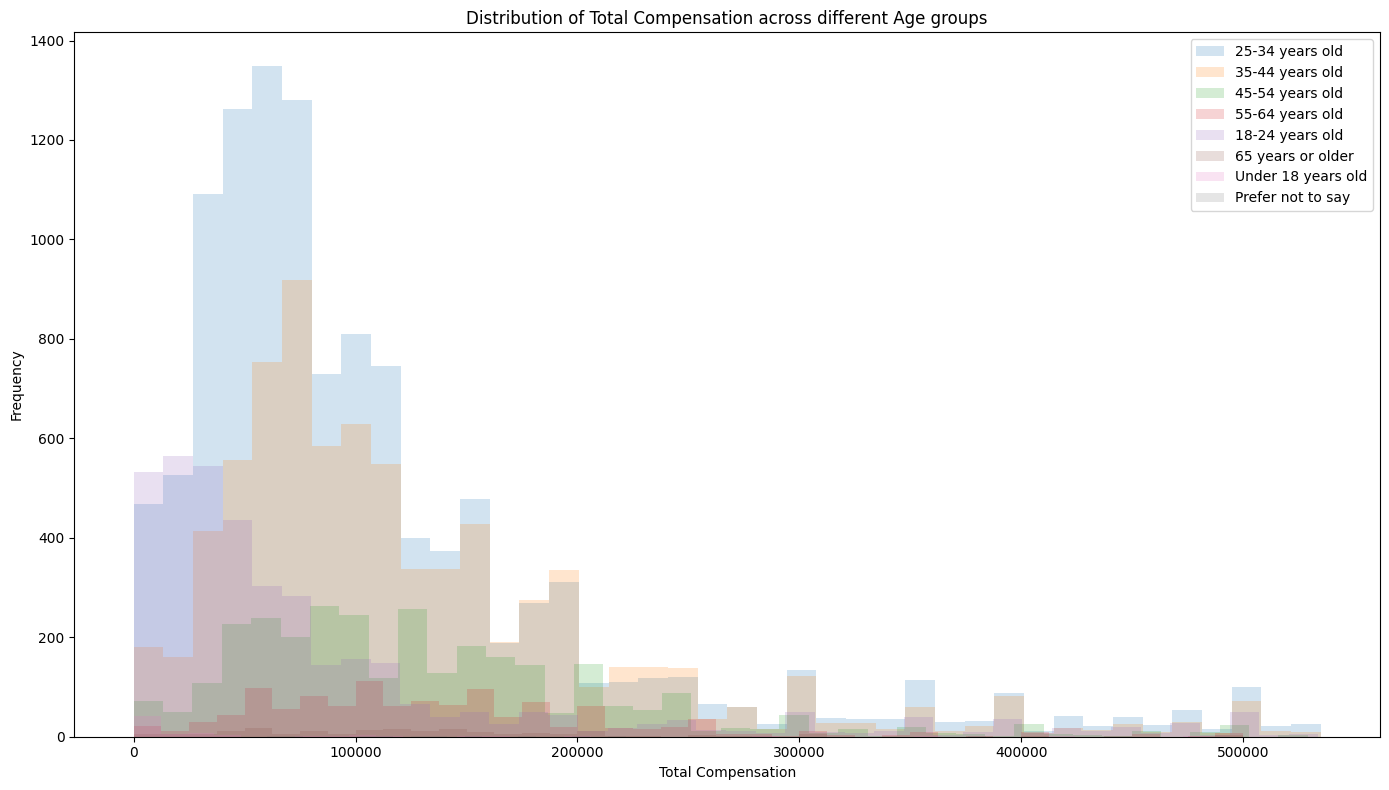

In [15]:
plt.figure(figsize=(14, 8))
for group in df['Age'].unique():
    plot_sub = df[df['Age'] == group]
    plt.hist(plot_sub['CompTotal'], bins=40, alpha=.2, label=group)

plt.title('Distribution of Total Compensation across different Age groups')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [16]:
## Write your code here
QUERY = """
    SELECT Age, TimeSearching
    FROM main
    WHERE Age IS NOT NULL
    AND TimeSearching IS NOT NULL
    ORDER BY Age
"""
df = pd.read_sql_query(QUERY, conn)
df.head()

,Age,TimeSearching
0,18-24 years old,30-60 minutes a day
1,18-24 years old,30-60 minutes a day
2,18-24 years old,15-30 minutes a day
3,18-24 years old,60-120 minutes a day
4,18-24 years old,15-30 minutes a day


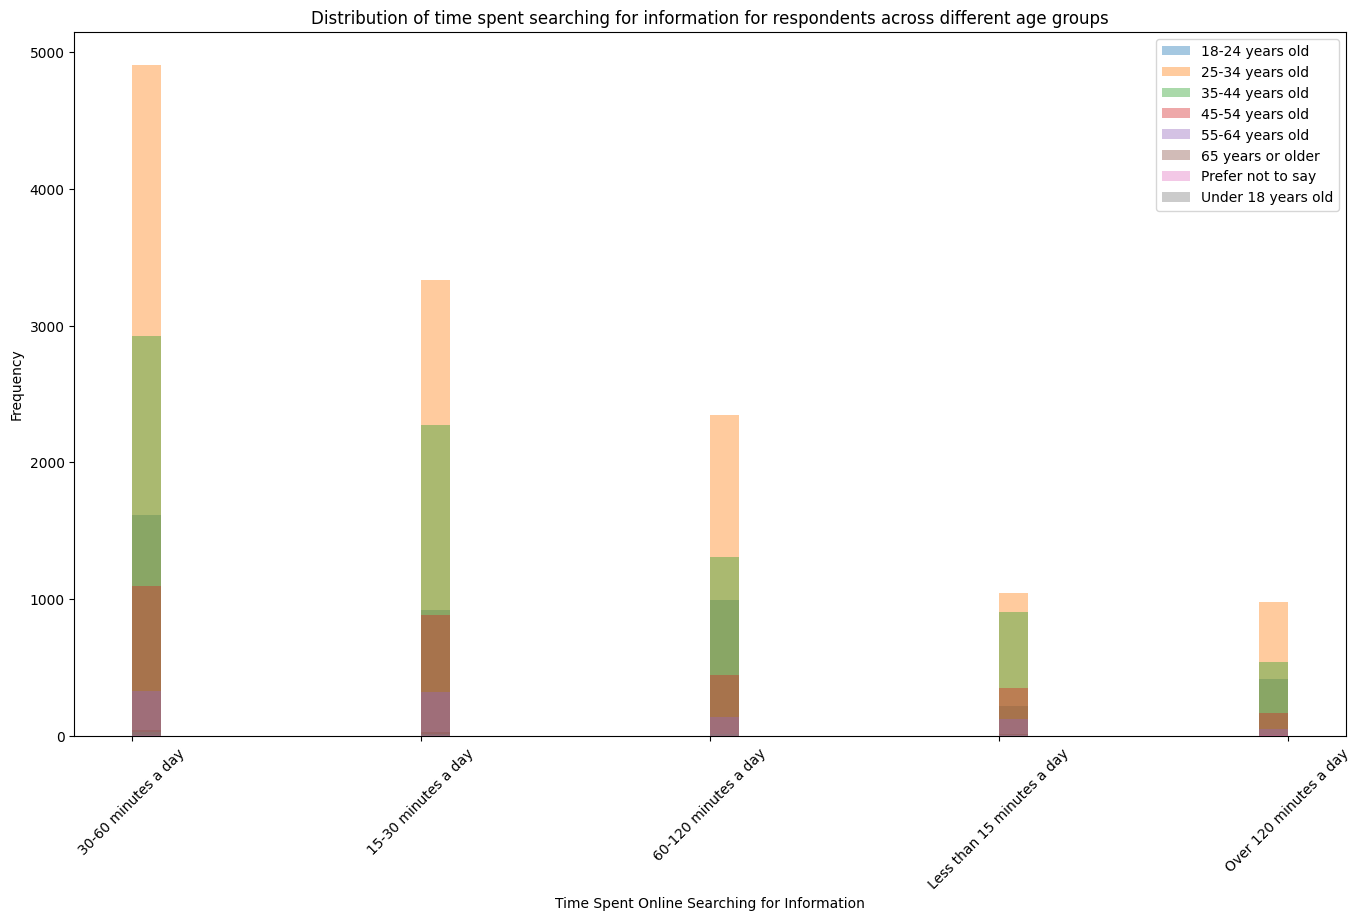

In [17]:
plt.figure(figsize=(14, 8))
for group in df['Age'].unique():
    sub_plot = df[df['Age'] == group]
    plt.hist(sub_plot['TimeSearching'], bins=40, alpha=.4, label=group)
plt.title('Distribution of time spent searching for information for respondents across different age groups')
plt.xlabel('Time Spent Online Searching for Information')
plt.ylabel('Frequency')
plt.tight_layout()
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [18]:
## Write your code here
QUERY = """
    SELECT DatabaseWantToWorkWith
    FROM main
    WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df.value_counts()

DatabaseWantToWorkWith                                                                                                                                                                                                                                                                                         
PostgreSQL                                                                                                                                                                                                                                                                                                         3738
PostgreSQL;SQLite                                                                                                                                                                                                                                                                                                  1533
SQLite                                                                  

In [19]:
df = df['DatabaseWantToWorkWith'].str.split(';')
df_expl = df.explode('DatabaseWantToWorkWith')
df_expl = df_expl.astype(str).str.strip()
df_expl

0                         PostgreSQL
1         Firebase Realtime Database
2                            MongoDB
3                              MySQL
4                         PostgreSQL
                     ...            
127434                    PostgreSQL
127435                        SQLite
127436                       MongoDB
127437                         MySQL
127438                    PostgreSQL
Name: DatabaseWantToWorkWith, Length: 127439, dtype: object

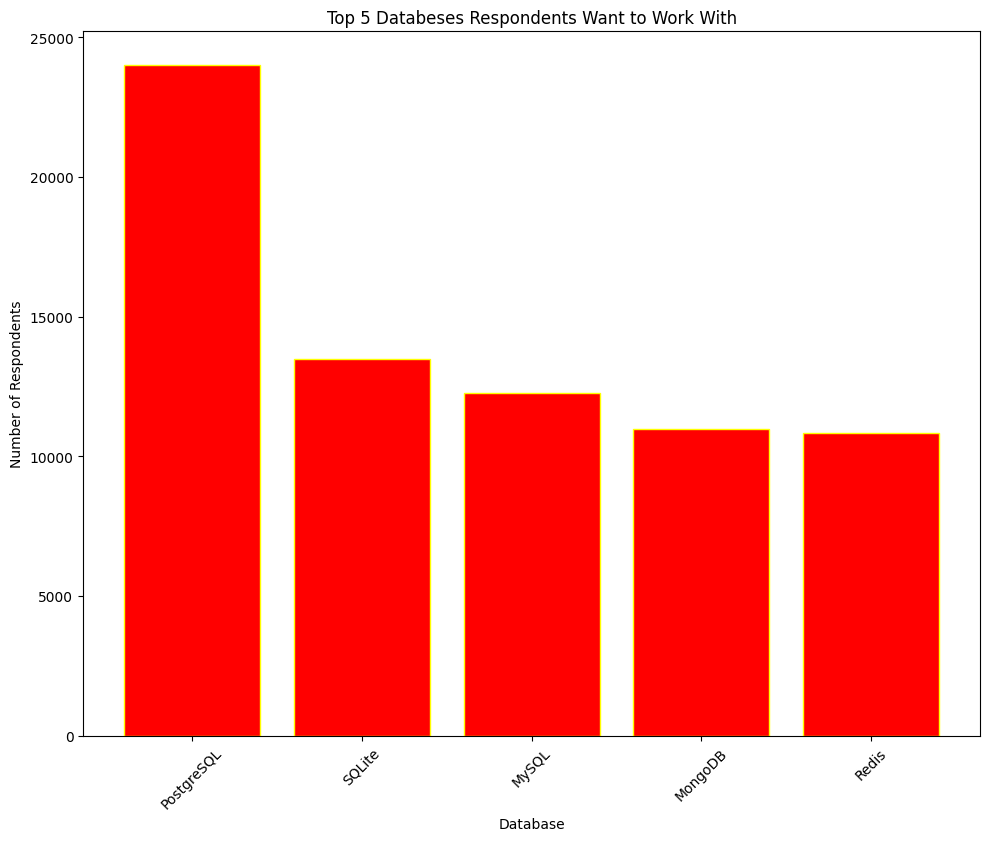

In [20]:
df_plot = df_expl.value_counts().head(5)
plt.figure(figsize=(10, 8))
plt.bar(df_plot.index,df_plot.values,color='red', edgecolor='yellow')
plt.title('Top 5 Databeses Respondents Want to Work With')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [21]:
## Write your code here
QUERY = """
    SELECT RemoteWork
    FROM main
    WHERE RemoteWork IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df['RemoteWork'].unique()

array(['Remote', 'In-person', 'Hybrid (some remote, some in-person)'],
      dtype=object)

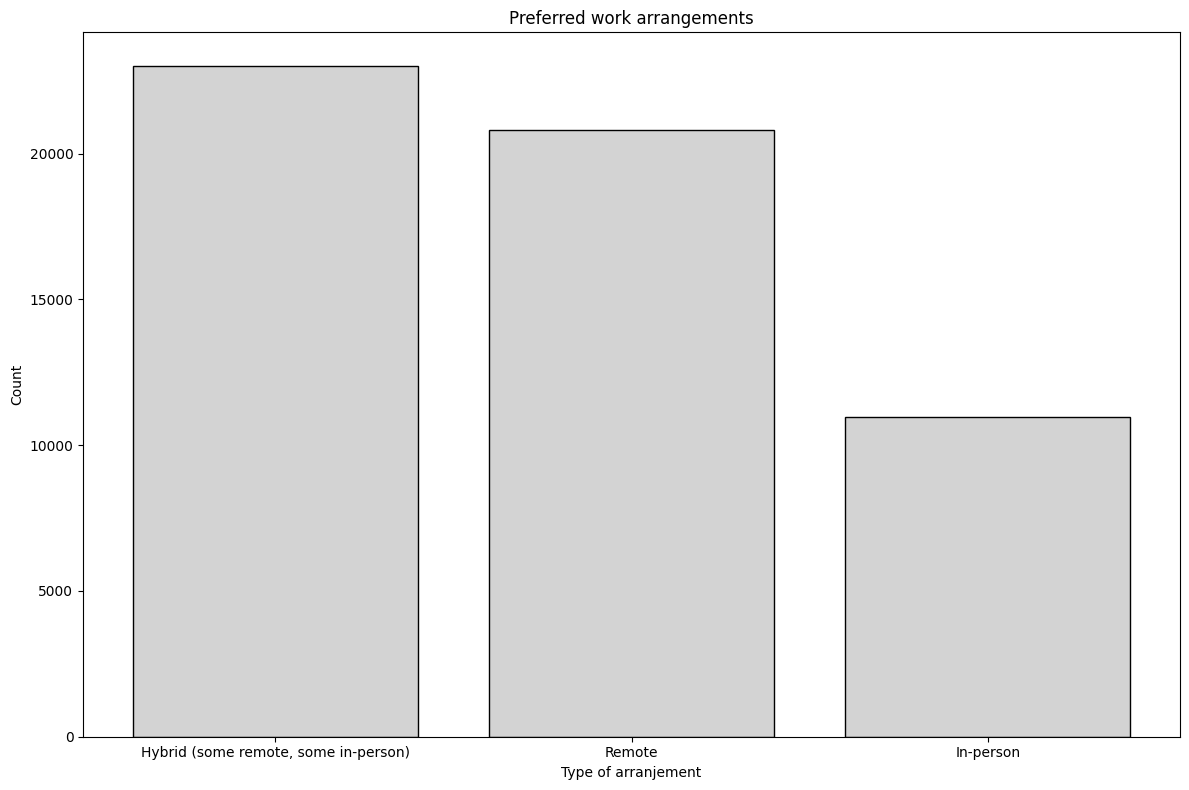

In [22]:
df_plot = df['RemoteWork'].value_counts()
plt.figure(figsize=(12, 8))
plt.bar(x=df_plot.index, height=df_plot.values, color='lightgrey', edgecolor='black')
plt.title('Preferred work arrangements')
plt.xlabel('Type of arranjement')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


In [23]:
## Write your code here
QUERY = """
    SELECT Age, CompTotal
    FROM main
    WHERE Age IS NOT NULL
    AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df.head()

,Age,CompTotal
0,18-24 years old,2040000.0
1,25-34 years old,28000.0
2,35-44 years old,85000.0
3,35-44 years old,50000.0
4,25-34 years old,110000.0


In [24]:
age_group = ['45-54 years old', '55-64 years old']
df_filter = df[df['Age'].isin(age_group)]

In [25]:
## Removing outliers
q1 = df_filter['CompTotal'].quantile(.25)
q3 = df_filter['CompTotal'].quantile(.75)
iqr = q3 - q1

bound_low = q1 - 1.5*iqr
bound_up = q3 + 1.5*iqr

df_filter = df_filter[(df_filter['CompTotal']>=bound_low) & (df_filter['CompTotal']<=bound_up)]

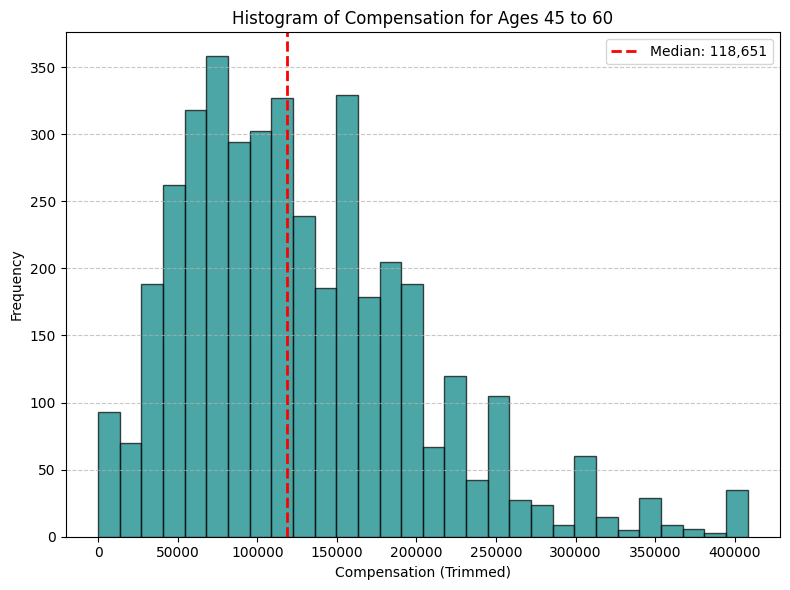

In [26]:
median_comp = df_filter["CompTotal"].median()
plt.figure(figsize=(8, 6))

plt.hist(df_filter["CompTotal"], bins=30, color="teal", edgecolor="black", alpha=0.7)
plt.axvline(median_comp, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_comp:,.0f}')

plt.title("Histogram of Compensation for Ages 45 to 60")
plt.xlabel("Compensation (Trimmed)")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [34]:
## Write your code here
QUERY = """
SELECT JobSat, YearsCodePro
FROM main
WHERE JobSat IS NOT NULL
AND YearsCodePro IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)
df.head()

,JobSat,YearsCodePro
0,8.0,12
1,5.0,27
2,10.0,10
3,6.0,Less than 1 year
4,9.0,18


In [35]:
df['JobSat'].value_counts()

JobSat
8.0     7325
7.0     6243
6.0     3651
9.0     3557
10.0    2196
5.0     1869
3.0     1141
4.0     1097
2.0      736
0.0      284
1.0      257
Name: count, dtype: int64

In [36]:
df['YearsCodePro'].value_counts()

YearsCodePro
3                     2261
2                     2153
5                     2016
10                    1918
4                     1866
6                     1725
8                     1588
7                     1533
1                     1173
12                    1111
9                      973
15                     935
20                     819
11                     806
Less than 1 year       780
13                     703
14                     629
16                     577
18                     526
25                     505
17                     481
24                     343
30                     318
19                     312
22                     275
23                     258
26                     243
21                     216
27                     212
28                     170
35                     122
29                     100
32                     100
40                      90
33                      72
34                      72
36             

In [37]:
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 0.5, 'More than 50 years': 51})
df['YearsCodePro'] = df['YearsCodePro'].astype('float')

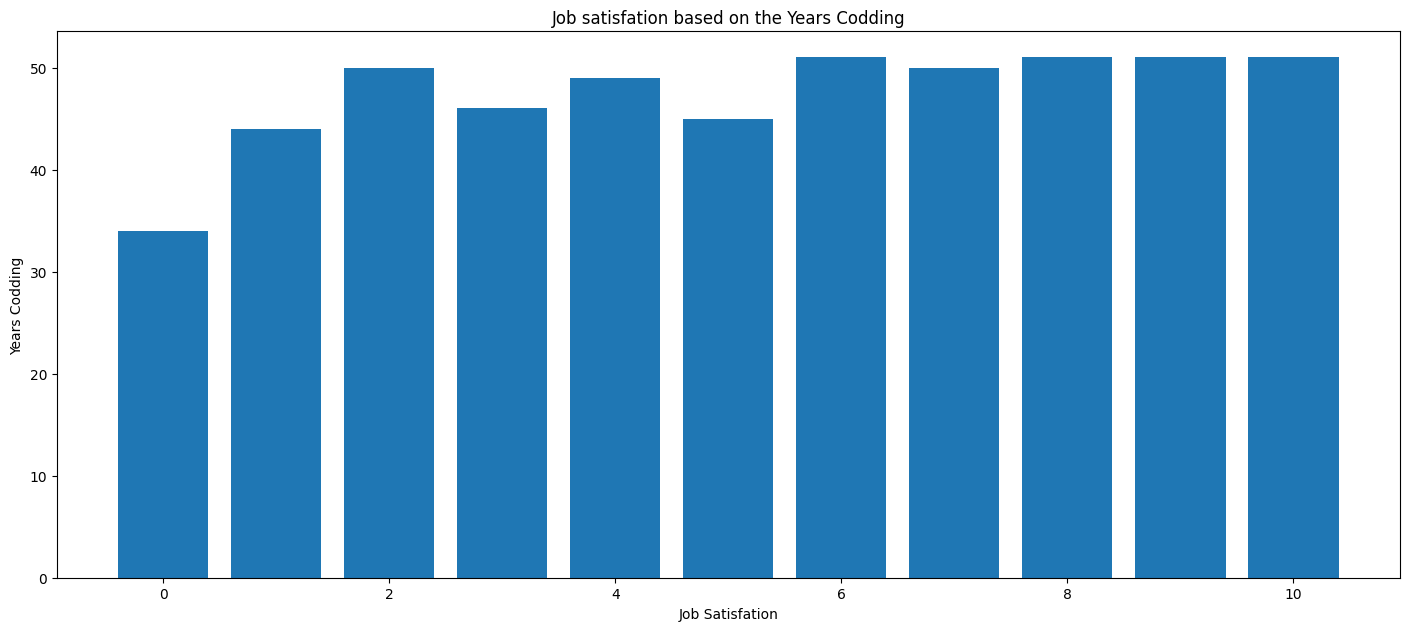

In [39]:
plt.figure(figsize=(14, 6))
plt.bar(x=df['JobSat'], height=df['YearsCodePro'])
plt.tight_layout()
plt.title('Job satisfation based on the Years Codding')
plt.xlabel('Job Satisfation')
plt.ylabel('Years Codding')
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [40]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
